## Reading the data

We are using the data prepared in the `01_data_preparation.ipynb` notebook


### **Data description**

| #  | **Column Name**        | **Description**                                              |
|----|------------------------|--------------------------------------------------------------|
| 1  | series_title           | Title of the TV series                                       |
| 2  | imdb_rating            | IMDb rating of the series                                    |
| 3  | age_of_series          | Number of years since the series premiered                   |
| 4  | r_rated                | Whether the series is rated R (True/False)                   |
| 5  | no_of_seasons          | Number of seasons the series has                             |
| 6  | sentiment              | General sentiment of the series (e.g., Positive/Negative)    |
| 7  | multiple_platforms     | Is available on more than one streaming platform             |
| 8  | netflix                | Available on Netflix (True/False)                            |
| 9  | hulu                   | Available on Hulu (True/False)                               |
| 10 | prime_video            | Available on Prime Video (True/False)                        |
| 11 | true_crime             | Series belongs to true crime genre (True/False)              |
| 12 | world_war              | Series includes World War themes (True/False)                |
| 13 | award_winning          | Series has won awards (True/False)                           |
| 14 | serial_killer          | Series involves a serial killer theme (True/False)           |
| 15 | emmy_award             | Has won an Emmy award (True/False)                           |
| 16 | love                   | Contains love/romance themes (True/False)                    |
| 17 | genre_gameshow         | Series is a game show (True/False)                           |
| 18 | genre_animation        | Animated series (True/False)                                 |
| 19 | genre_children         | Targeted toward children (True/False)                        |
| 20 | genre_crime            | Belongs to the crime genre (True/False)                      |
| 21 | genre_drama            | Belongs to the drama genre (True/False)                      |
| 22 | genre_anime            | Anime series (True/False)                                    |
| 23 | genre_comedy           | Belongs to the comedy genre (True/False)                     |
| 24 | genre_documentary      | Documentary-style series (True/False)                        |
| 25 | genre_reality          | Reality TV series (True/False)                               |
| 26 | genre_fiction          | Fictional series (True/False)                                |
| 27 | genre_actionadventure  | Action/Adventure genre series (True/False)                   |
| 28 | genre_homegarden       | Related to home/garden topics (True/False)                   |
| 29 | genre_standuptalk      | Stand-up or talk show format (True/False)     

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

shows = pd.read_csv("../data/series_data_prepared.csv")
shows

,series_title,imdb_rating,age_of_series,r_rated,no_of_seasons,sentiment,multiple_platforms,netflix,hulu,prime_video,...,genre_crime,genre_drama,genre_anime,genre_comedy,genre_documentary,genre_reality,genre_fiction,genre_actionadventure,genre_homegarden,genre_standuptalk
0,Breaking Bad,9.5,12,1,5,-0.9275,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
1,Game of Thrones,9.3,9,1,8,-0.9686,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,Rick and Morty,9.2,7,1,4,-0.8577,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,Stranger Things,8.8,4,0,3,-0.6378,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,The Boys,8.7,1,1,2,0.3167,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,Time Travel Shoujo: Mari Waka to 8-nin no Kaga...,3.3,4,0,1,-0.4939,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8788,Mrs. Fitzgerald Is Missing,3.3,2,0,2,-0.6808,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8789,The Edinburgh Show,3.3,1,0,1,-0.2960,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8790,Coming to the Stage,3.3,17,0,6,0.7845,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Explanatory data analysis

In [2]:
import ydata_profiling
report =  ydata_profiling.ProfileReport(shows, title = "IMBD show ratings report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:00<00:00, 95.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Splitting the sample

In [2]:
# Separate explanatories matrix from the target feature
y = shows['imdb_rating']
X = shows.drop(columns=['imdb_rating', 'series_title'])

In [4]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

data_dict = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

# Loop through the dictionary to save each variable
for name, data in data_dict.items():
    filename = f"../data/{name}_data.csv"
    
    # Convert the data to DataFrame and save to CSV
    data_df = pd.DataFrame(data)
    data_df.to_csv(filename, index=False)
    
    print(f"{name} has been saved to {filename}")

X_train has been saved to ../data/X_train_data.csv
X_test has been saved to ../data/X_test_data.csv
y_train has been saved to ../data/y_train_data.csv
y_test has been saved to ../data/y_test_data.csv


## Modelling

### XGBoost

In [2]:
X_test = pd.read_csv("../data/X_test_data.csv")
X_train = pd.read_csv("../data/X_train_data.csv")
y_test = pd.read_csv("../data/y_test_data.csv")
y_train = pd.read_csv("../data/y_train_data.csv")

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LearningCurveDisplay
from xgboost import XGBRegressor

import joblib

import optuna 
from optuna.samplers import TPESampler

import matplotlib.pyplot as plt

In [4]:
X_train.columns

Index(['age_of_series', 'r_rated', 'no_of_seasons', 'sentiment',
       'multiple_platforms', 'netflix', 'hulu', 'prime_video', 'true_crime',
       'world_war', 'award_winning', 'serial_killer', 'emmy_award', 'love',
       'genre_gameshow', 'genre_animation', 'genre_children', 'genre_crime',
       'genre_drama', 'genre_anime', 'genre_comedy', 'genre_documentary',
       'genre_reality', 'genre_fiction', 'genre_actionadventure',
       'genre_homegarden', 'genre_standuptalk'],
      dtype='object')

In [5]:
preprocessor_all_vars = ColumnTransformer([
    ('all_vars', 'passthrough', X_train.columns.to_list())])

# second option doesn't consider highly imbalanced variables (over 90%)
limited = [col for col in X_train.columns if col not in ['true_crime', 'world_war', 'award_winning',
                                                         'serial_killer', 'emmy_award', 'genre_homegarden',
                                                         'genre_standuptalk'
                                                         ]]

preprocessor_vars_limited = ColumnTransformer([
    ('all_vars', 'passthrough', limited)])


strategies = {
    'all_vars': preprocessor_all_vars, 
    'limited_vars': preprocessor_vars_limited
}



In [ ]:
def make_objective(preprocessor): 
    def objective(trial): 

        params = {
            'n_estimators': trial.suggest_int("n_estimators", 50, 500, step=50), 
            'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.05),
            'max_depth': trial.suggest_int("max_depth", 2, 4), 
            'subsample': trial.suggest_float("subsample", 0.5, 0.8),
            'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 0.9),
            'min_child_weight': trial.suggest_int("min_child_weight", 5, 15), 
            'reg_lambda': trial.suggest_float("reg_lambda", 0, 3),
            'random_state': 42,
            'n_jobs': -1
        }

        pipeline_xgb = Pipeline([
            ('preprocess', preprocessor),
            ('model', XGBRegressor(**params))
        ])
        
        mse_scores = cross_val_score(
            estimator = pipeline_xgb,
            X=X_train, 
            y=y_train.values.ravel(), 
            cv=KFold(n_splits=5, shuffle=True, random_state=42), 
            scoring="neg_mean_squared_error", 
            n_jobs=-1
        )
        
        rmse_score = np.sqrt(-mse_scores).mean()
        return rmse_score
    return objective

In [118]:
for name, preprocessor in strategies.items(): 
    study=optuna.create_study(direction="minimize", sampler=TPESampler(seed=89))
    study.optimize(make_objective(preprocessor=preprocessor), n_trials=100)

    joblib.dump(study, f"../models/shows_xgb_{name}.pkl")

[I 2025-05-31 12:30:14,668] A new study created in memory with name: no-name-8a033b7e-7db5-4b9a-8945-7d8966c857e7


[I 2025-05-31 12:30:14,956] Trial 0 finished with value: 1.1640733412275808 and parameters: {'n_estimators': 250, 'learning_rate': 0.020237485372466807, 'max_depth': 2, 'subsample': 0.5290765128317493, 'colsample_bytree': 0.7256740458247699, 'min_child_weight': 5, 'reg_lambda': 0.45778568665175623}. Best is trial 0 with value: 1.1640733412275808.
[I 2025-05-31 12:30:15,181] Trial 1 finished with value: 1.1572259516587464 and parameters: {'n_estimators': 250, 'learning_rate': 0.01399491039090079, 'max_depth': 3, 'subsample': 0.7740952440389757, 'colsample_bytree': 0.640287804122015, 'min_child_weight': 6, 'reg_lambda': 2.137825171506552}. Best is trial 1 with value: 1.1572259516587464.
[I 2025-05-31 12:30:15,374] Trial 2 finished with value: 1.1634314937765127 and parameters: {'n_estimators': 100, 'learning_rate': 0.026228017575266244, 'max_depth': 3, 'subsample': 0.5415078113184842, 'colsample_bytree': 0.8321732356938271, 'min_child_weight': 6, 'reg_lambda': 1.763374663344678}. Best is

In [ ]:
# Loading the studies
study_xgb_all_vars = joblib.load("../models/shows_xgb_all_vars.pkl")
study_xgb_limited_vars = joblib.load("../models/shows_xgb_limited_vars.pkl")

In [7]:
# Checking the best parameters

print(f"Best set of parameters for XGB with all variables: {study_xgb_all_vars.best_params}")
print(f"Best set of parameters for XGB with limited variables: {study_xgb_limited_vars.best_params}")

Best set of parameters for XGB with all variables: {'n_estimators': 350, 'learning_rate': 0.035279580965606905, 'max_depth': 4, 'subsample': 0.7834418509895212, 'colsample_bytree': 0.792385792381177, 'min_child_weight': 8, 'reg_lambda': 1.0673222105226392}
Best set of parameters for XGB with limited variables: {'n_estimators': 500, 'learning_rate': 0.026928459861334027, 'max_depth': 4, 'subsample': 0.7310558445998481, 'colsample_bytree': 0.8509925973740773, 'min_child_weight': 5, 'reg_lambda': 2.1736004387638412}


In [8]:
# Checking the RMSE

print(f"Best RMSE on train data with CV for XGB with all variables: {study_xgb_all_vars.best_value}")
print(f"Best RMSE on train data with CV for XGB with limited variables: {study_xgb_limited_vars.best_value}")

Best RMSE on train data with CV for XGB with all variables: 1.1287685122525721
Best RMSE on train data with CV for XGB with limited variables: 1.1290351237272849


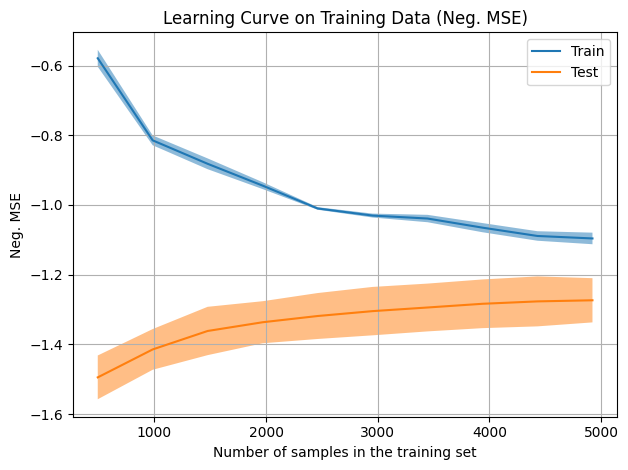

In [9]:
# Let's visualize the learing curve for the better performing model (all variables)

best_params = study_xgb_all_vars.best_params
best_params.update({'random_state': 42, 'n_jobs': -1})

pipeline_xgb = Pipeline([
    ('preprocess', preprocessor_all_vars),
    ('model', XGBRegressor(**best_params))
])

LearningCurveDisplay.from_estimator(
    estimator=pipeline_xgb,
    X=X_train,
    y=y_train.values.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    score_name="Neg. MSE"  # or change to "RMSE" if you convert later
)

plt.title("Learning Curve on Training Data (Neg. MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

We can observe that for the training data the neg-MSE is getting worse as more data is added (overfitting is reduced). As for the test data (CV) the neg-MSE is decreasing. At the end of training they are getting closer to each other, suggesting that the overfittng is being reduced.

### Training and dumping the models with the optimized parameters for further use in the next steps

In [ ]:
pipeline_xgb_all_vars = Pipeline([
    ('preprocess', strategies['all_vars']), 
    ('model', XGBRegressor(**study_xgb_all_vars.best_params, random_state=42, n_jobs=-1))
])

pipeline_xgb_all_vars.fit(X_train, y_train.values.ravel())

# Dump the Forest 
joblib.dump(pipeline_xgb_all_vars, "../models/shows_xgb_all_vars.joblib")

['../models/shows_xgb_all_vars.joblib']

In [16]:
pipeline_xgb_limited_vars = Pipeline([
    ('preprocess', strategies['limited_vars']), 
    ('model', XGBRegressor(**study_xgb_limited_vars.best_params, random_state=42, n_jobs=-1))
])

pipeline_xgb_limited_vars.fit(X_train, y_train.values.ravel())

# Dump the Forest 
joblib.dump(pipeline_xgb_limited_vars, "../models/shows_xgb_limited_vars.joblib")

['../models/shows_xgb_limited_vars.joblib']

### Random Forest

In [8]:
import os
print(os.getcwd())

/home/karolina/XAI-project/notebooks


In [17]:
X_test=pd.read_csv("../data/X_test_data.csv")
X_train=pd.read_csv("../data/X_train_data.csv")
y_test=pd.read_csv("../data/y_test_data.csv")
y_train=pd.read_csv("../data/y_train_data.csv")

In [26]:
def make_rf_objective(preprocessor):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int("n_estimators", 100, 1000, step=100),
            'max_depth': trial.suggest_int("max_depth", 2, 20),
            'min_samples_leaf': trial.suggest_int("min_samples_leaf", 10, 100),
             'max_features': trial.suggest_float("max_features", 0.3, 1.0),
            'bootstrap': trial.suggest_categorical("bootstrap", [True, False]),
            'random_state': 42,
            'n_jobs': -1
        }

        if params['bootstrap']==True:
            params['max_samples'] = trial.suggest_float("max_samples", 0.5, 1.0)

        pipeline_rf = Pipeline([
            ('preprocess', preprocessor),
            ('model', RandomForestRegressor(**params))
        ])

        mse_scores = cross_val_score(
            estimator=pipeline_rf,
            X=X_train,
            y=y_train.values.ravel(),
            cv=KFold(n_splits=5, shuffle=True, random_state=42),
            scoring="neg_mean_squared_error",
            n_jobs=-1
        )

        rmse_score = np.sqrt(-mse_scores).mean()
        return rmse_score

    return objective

In [27]:
for name, preprocessor in strategies.items(): 
    study=optuna.create_study(direction="minimize", sampler=TPESampler(seed=89))
    study.optimize(make_rf_objective(preprocessor=preprocessor), n_trials=100)

    joblib.dump(study, f"../models/shows_rf_{name}.pkl")

[I 2025-05-29 16:47:22,685] A new study created in memory with name: no-name-884667f2-d961-48f1-b857-36cdd0284563
[I 2025-05-29 16:47:26,744] Trial 0 finished with value: 1.16391030914729 and parameters: {'n_estimators': 500, 'max_depth': 6, 'min_samples_leaf': 33, 'max_features': 0.3678451966074149, 'bootstrap': True, 'max_samples': 0.5762976144419594}. Best is trial 0 with value: 1.16391030914729.
[I 2025-05-29 16:47:30,198] Trial 1 finished with value: 1.1866351930369776 and parameters: {'n_estimators': 500, 'max_depth': 3, 'min_samples_leaf': 47, 'max_features': 0.9395555694242763, 'bootstrap': True, 'max_samples': 0.8563041952510919}. Best is trial 0 with value: 1.16391030914729.
[I 2025-05-29 16:47:31,330] Trial 2 finished with value: 1.1575818494575176 and parameters: {'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 70, 'max_features': 0.3968515597431299, 'bootstrap': True, 'max_samples': 0.7938957772241131}. Best is trial 2 with value: 1.1575818494575176.
[I 2025-05-29

In [16]:
# Loading the studies
study_rf_all_vars = joblib.load("../models/shows_rf_all_vars.pkl")
study_rf_limited_vars = joblib.load("../models/shows_rf_limited_vars.pkl")

In [17]:
# Checking the RMSE

print(f"Best RMSE on train data with CV for RF with all variables: {study_rf_all_vars.best_value}")
print(f"Best RMSE on train data with CV for RF with limited variables: {study_rf_limited_vars.best_value}")

Best RMSE on train data with CV for RF with all variables: 1.1309751311163245
Best RMSE on train data with CV for RF with limited variables: 1.1298296938038779


In [32]:

print(f"Best set of parameters for RF with coordinates: {study_rf_all_vars.best_params}")
print(f"Best set of parameters for RF with district names: {study_rf_limited_vars.best_params}")

Best set of parameters for RF with coordinates: {'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 0.6356170725466702, 'bootstrap': True, 'max_samples': 0.989585836779886}
Best set of parameters for RF with district names: {'n_estimators': 900, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 0.3079887338694968, 'bootstrap': True, 'max_samples': 0.9449352003527252}


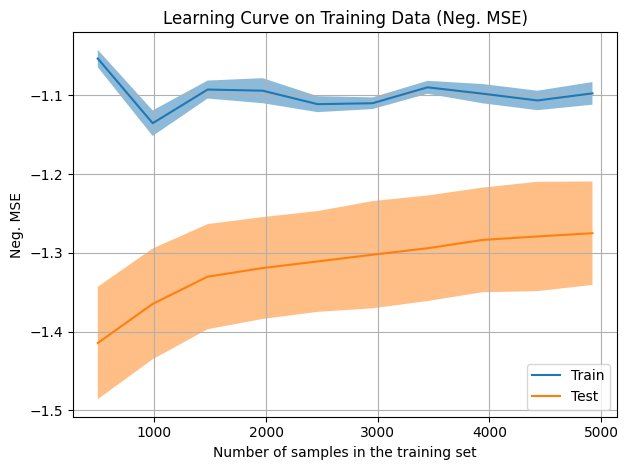

In [29]:
# Limited variables

best_params_rf = study_rf_limited_vars.best_params
best_params_rf.update({'random_state': 42, 'n_jobs': -1})

pipeline_rf = Pipeline([
    ('preprocess', preprocessor_vars_limited),
    ('model', RandomForestRegressor(**best_params_rf))
])

LearningCurveDisplay.from_estimator(
    estimator=pipeline_rf,
    X=X_train,
    y=y_train.values.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    score_name="Neg. MSE"  # or change to "RMSE" if you convert later
)

plt.title("Learning Curve on Training Data (Neg. MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Evaluation

In [ ]:

model_files = {
    'RF All Variables': '../models/shows_rf_all_vars.pkl',
    'RF Limited': '../models/shows_rf_limited_vars.pkl',
    'XGB All Variables Coords': '../models/shows_xgb_all_vars.pkl',
    'XGB Limited': '../models/shows_xgb_limited_vars.pkl'
}

models = {name: joblib.load(path) for name, path in model_files.items()}

In [38]:
from sklearn.metrics import mean_squared_error

strategies = {
    'RF All Variables': preprocessor_all_vars,
    'RF Limited': preprocessor_vars_limited,
    'XGB All Variables Coords': preprocessor_all_vars,
    'XGB Limited': preprocessor_vars_limited
}

# Map to appropriate estimator class
model_classes = {
    'RF': RandomForestRegressor,
    'XGB': XGBRegressor
}

results = []
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, path in model_files.items():
    study = joblib.load(path)
    best_params = study.best_trial.params
    
    # Add static params if missing
    best_params.update({'random_state': 42, 'n_jobs': -1})

    # Choose model type
    model_type = 'RF' if 'RF' in name else 'XGB'
    model_class = model_classes[model_type]
    
    # Build pipeline
    preprocessor = strategies[name]
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model_class(**best_params))
    ])
    
    # Evaluate with CV
    neg_mses = cross_val_score(
        pipeline, X_train, y_train.values.ravel(),
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    rmse_train = np.sqrt(-neg_mses).mean()

    # Fit & predict
    pipeline.fit(X_train, y_train.values.ravel())
    y_pred = pipeline.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({'model': name, 'rmse_train': rmse_train, 'rmse_test': rmse_test})

In [39]:
df_results = pd.DataFrame(results)
df_results

,model,rmse_train,rmse_test
0,RF All Variables,1.130975,1.071098
1,RF Limited,1.129830,1.067891
2,XGB All Variables Coords,1.126798,1.067015
3,XGB Limited,1.127550,1.068992


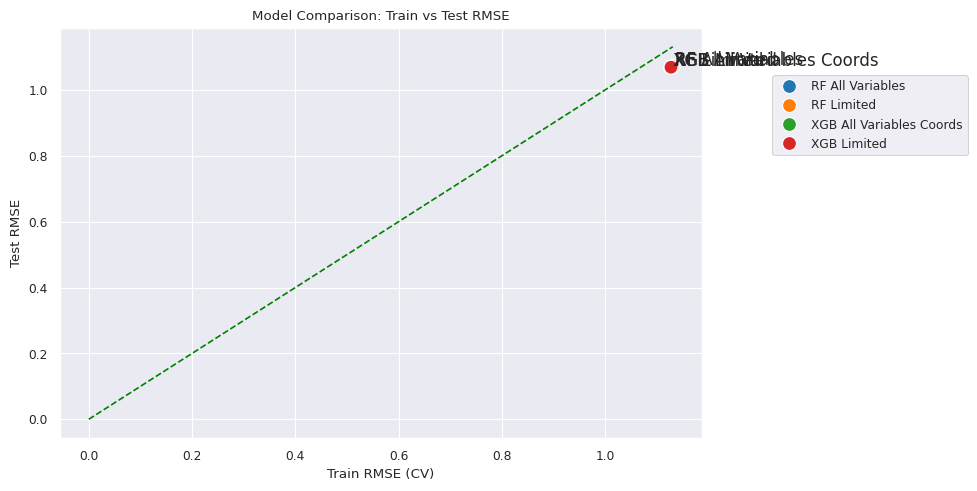

In [42]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.set_context("paper")
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=df_results,
                     x='rmse_train', y='rmse_test',
                     hue='model', 
                     s=100)

g = max(df_results['rmse_train'].max(), df_results['rmse_test'].max())
ax.plot([0, g], [0, g], '--', color='green')


for idx, row in df_results.iterrows():
    ax.text(row['rmse_train'] + 0.005, row['rmse_test'] + 0.005,
            row['model'], fontsize=12)

ax.set_xlabel('Train RMSE (CV)')
ax.set_ylabel('Test RMSE')
ax.set_title('Model Comparison: Train vs Test RMSE')
plt.legend(bbox_to_anchor=(1.1, 0.9), loc='upper left')
plt.tight_layout()
plt.show()